In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from intake import cat
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import panel
import panel.widgets as pnw
panel.extension()


<table>
    <tr>
        <td align="center" style="background-color : white">
            <img src="https://panel.pyviz.org/_static/logo_stacked.png" alt="Panel" width=100>
        </td>
    </tr>
    <tr>
        <td align="center" style="background-color : white">
            <a href="https://panel.pyviz.org/" style="font-size: 30px; background-color: white; border: hidden;">https://panel.pydata.org</a>
        </td>
    </tr>
</table>
      

# Panel

Panel is a high-level dashboarding and application development solution built on top of [Bokeh](https://bokeh.org).  It facilitates:


 * Plots with user-defined controls
 * Property sheets for editing parameters in a workflow
 * Control panels for simulations or experiments
 * Custom data-exploration tools
 * Dashboards reporting
 * Data-rich Python-backed web servers

# Simple Panel App

In [2]:
def create_plot(API, oil_or_gas='oil'):
    fig, ax1 = plt.subplots()
    df = cat.production.production_by_api(api=API).read().set_index(['date'])
    if oil_or_gas == 'oil':
        liquid = df['volume_oil_formation_bbls'].values
        ax1.set_ylabel('Oil Production (bbls)', color='b')
    if oil_or_gas == 'gas':
        liquid = df['volume_gas_formation_mcf'].values
        ax1.set_ylabel('Gas Production (mcf)', color='b')
    dates = df.index.values
    
    ax2 = ax1.twinx()
    ax1.plot(dates, liquid, 'b')
    ax1.set_xlabel('Years')
    ax1.set_title('API = {}'.format(API))
    plt.close(fig)
    return fig

Column
    [0] Column
        [0] Select(name='API', options=['33105029270000', ...], value='33105029270000')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00099')
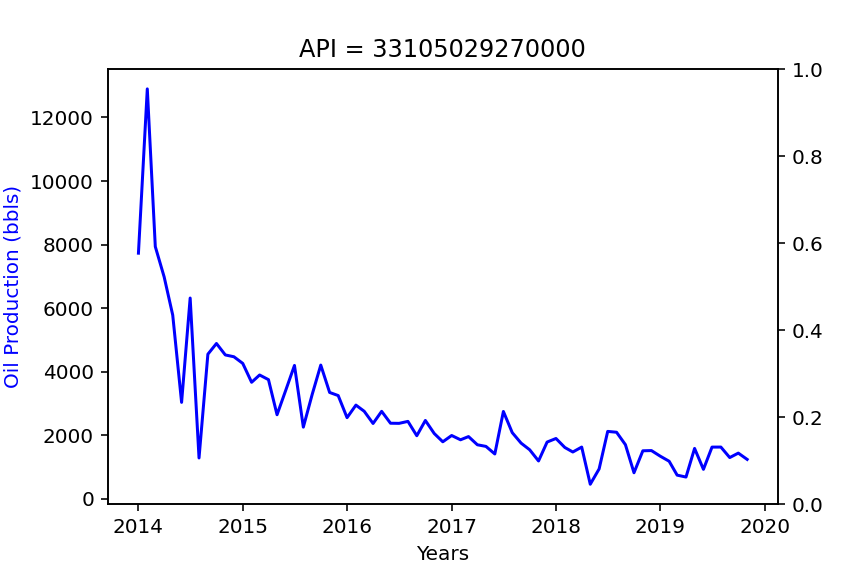

In [3]:
panel.interact(create_plot, API=['33105029270000', '33013014020000'])

# Controling placement of widgets

In [4]:
api_list = ['33013014020000','33105029270000','33013014020000','33105029270000','33013014020000','33105029270000']
i = panel.interact(create_plot, API=api_list)
i.pprint()

Column
    [0] Column
        [0] Select(name='API', options=['33013014020000', ...], value='33013014020000')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00110')


Row
    [0] Matplotlib(Figure, name='interactive00110')
    [1] Spacer(width=100)
    [2] Column
        [0] Markdown(str)
        [1] Select(name='API', options=['33013014020000', ...], value='33013014020000')
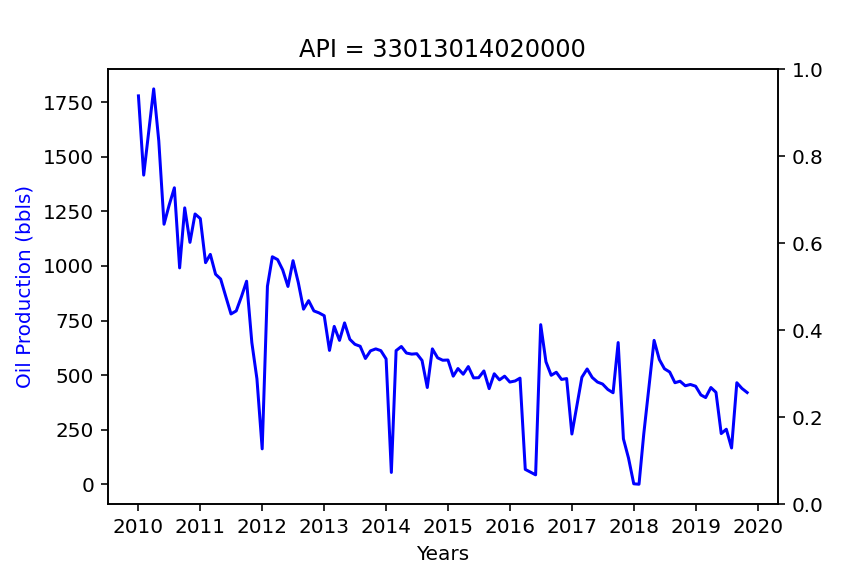

In [5]:
panel.Row(i[1][0], panel.Spacer(width=100), panel.Column("**Select the API:**", i[0][0]))

# Explicit declaration of widgets

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] Select(name='API', options=['33013014020000', ...], value='33013014020000')
        [2] Select(name='Reservoir Fluid', options=['oil', 'gas'], value='oil')
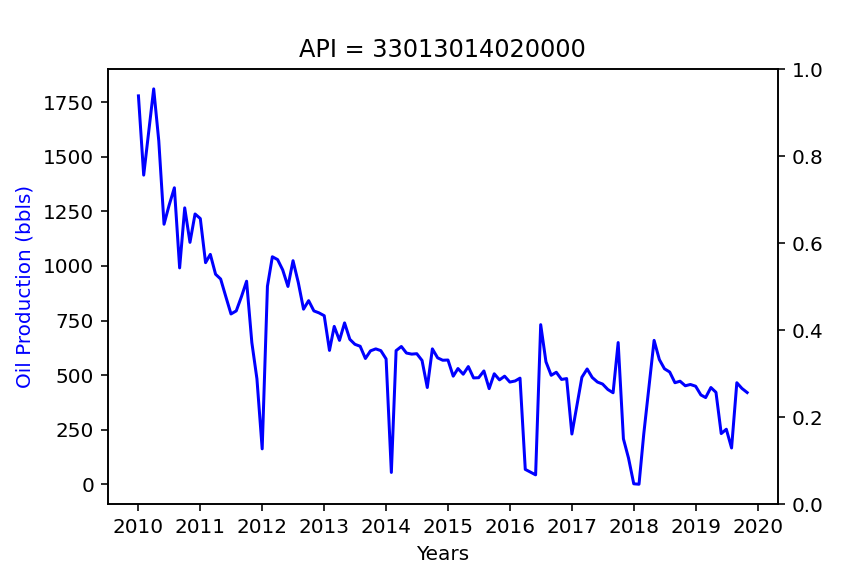

In [6]:
api  = panel.widgets.Select(name='API', options=['33013014020000','33105029270000'])
og = panel.widgets.Select(name='Reservoir Fluid', options=['oil','gas'])

@panel.depends(api.param.value, og.param.value)
def reactive_plot(api, og):
    return create_plot(api, og)

widgets    = panel.Column("**Select API and Reservoir Liquid:**", api, og)
side_panel = panel.Row(reactive_plot, widgets)

side_panel

# Declaritive panels with `param`

Example borrowed from [Panel Documentation](https://panel.pyviz.org/user_guide/Param.html)

In [7]:
import param
import datetime as dt

class BaseClass(param.Parameterized):
    x                       = param.Parameter(default=3.14,doc="X position")
    y                       = param.Parameter(default="Not editable",constant=True)
    string_value            = param.String(default="str",doc="A string")
    num_int                 = param.Integer(50000,bounds=(-200,100000))
    unbounded_int           = param.Integer(23)
    float_with_hard_bounds  = param.Number(8.2,bounds=(7.5,10))
    float_with_soft_bounds  = param.Number(0.5,bounds=(0,None),softbounds=(0,2))
    unbounded_float         = param.Number(30.01,precedence=0)
    hidden_parameter        = param.Number(2.718,precedence=-1)
    integer_range           = param.Range(default=(3,7),bounds=(0, 10))
    float_range             = param.Range(default=(0,1.57),bounds=(0, 3.145))
    dictionary              = param.Dict(default={"a":2, "b":9})
    
class Example(BaseClass):
    """An example Parameterized class"""
    timestamps = []

    boolean                 = param.Boolean(True, doc="A sample Boolean parameter")
    color                   = param.Color(default='#FFFFFF')
    date                    = param.Date(dt.datetime(2017, 1, 1),
                                         bounds=(dt.datetime(2017, 1, 1), dt.datetime(2017, 2, 1)))
    select_string           = param.ObjectSelector(default="yellow",objects=["red","yellow","green"])
    select_fn               = param.ObjectSelector(default=list,objects=[list,set,dict])
    int_list                = param.ListSelector(default=[3,5], objects=[1,3,5,7,9],precedence=0.5)
    single_file             = param.FileSelector(path='../../*/*.py*',precedence=0.5)
    multiple_files          = param.MultiFileSelector(path='../../*/*.py?',precedence=0.5)
    record_timestamp        = param.Action(lambda x: x.timestamps.append(dt.datetime.now()), 
                                           doc="""Record timestamp.""",precedence=0.7)
    
base = BaseClass()
panel.Row(Example.param, base.param)

Row
    [0] Column(margin=5, name='Example', width=300)
        [0] StaticText(value='<b>Example</b>')
        [1] FloatInput(name='Unbounded float', value=30.01, value_throttled=30.01)
        [2] LiteralInput(name='X', value=3.14)
        [3] LiteralInput(disabled=True, name='Y', value='Not editable')
        [4] TextInput(name='String value', value='str')
        [5] IntSlider(end=100000, name='Num int', start=-200, value=50000, value_throttled=50000)
        [6] IntInput(name='Unbounded int', value=23, value_throttled=23)
        [7] FloatSlider(end=10, name='Float with hard bounds', start=7.5, value=8.2, value_throttled=8.2)
        [8] FloatSlider(end=2, name='Float with soft bounds', value=0.5, value_throttled=0.5)
        [9] RangeSlider(end=10, name='Integer range', step=1, value=(3, 7), value_throttled=(3, 7))
        [10] RangeSlider(end=3.145, name='Float range', value=(0, 1.57), value_throttled=(0, 1.57))
        [11] DictInput(name='Dictionary', type=<class 'dict'>, value={'a': 2, 'b': 9})
        [12] Checkbox(name='Boolean', value=True)
        [13] ColorPicker(name='Color', value='#FFFFFF')
        [14] DatetimeInput(end=datetime.datetime(2017, ..., name='Date', start=datetime.datetime(2017, ..., type=<class 'datetime.datetime'..., value=datetime.datetime(2017, ...)
        [15] Select(options=OrderedDict([('red', ...]), value='yellow')
        [16] Select(options=OrderedDict([('list', ...]), value=<class 'list'>)
        [17] MultiSelect(name='Int list', options=OrderedDict([('1', ...]), value=[3, 5])
        [18] Select(name='Single file', options=OrderedDict([('jovyan/Pand...]), value='../../jovyan/PandasExerci...)
        [19] FileSelector(name='Multiple files')
        [20] Button(name='Record timestamp')
    [1] Column(margin=5, name='BaseClass', width=300)
        [0] StaticText(value='<b>BaseClass</b>')
        [1] FloatInput(name='Unbounded float', value=30.01, value_throttled=30.01)
        [2] LiteralInput(name='X', value=3.14)
        [3] LiteralInput(disabled=True, name='Y', value='Not editable')
        [4] TextInput(name='String value', value='str')
        [5] IntSlider(end=100000, name='Num int', start=-200, value=50000, value_throttled=50000)
        [6] IntInput(name='Unbounded int', value=23, value_throttled=23)
        [7] FloatSlider(end=10, name='Float with hard bounds', start=7.5, value=8.2, value_throttled=8.2)
        [8] FloatSlider(end=2, name='Float with soft bounds', value=0.5, value_throttled=0.5)
        [9] RangeSlider(end=10, name='Integer range', step=1, value=(3, 7), value_throttled=(3, 7))
        [10] RangeSlider(end=3.145, name='Float range', value=(0, 1.57), value_throttled=(0, 1.57))
        [11] DictInput(name='Dictionary', type=<class 'dict'>, value={'a': 2, 'b': 9})

# Using `@param.depends` to update widgets

In [8]:
class SelectStateAndTicker(param.Parameterized):
    
    
    #Selector box for state, saves parameter "state"
    state = param.ObjectSelector(default='NM', 
                                           objects=['ND', 'NM', 'TX'])
    
    #Finds the default tickers from state='NM'
    default_tickers = (cat.wells.tickers_by_state(state='NM')
                          .read()['parent_ticker']
                          .values.astype('str').tolist())
    
    #Selector box for tickers, saves parameter "ticker"
    ticker = param.ObjectSelector(default='BP', objects=default_tickers)
    
    
    @param.depends('state', watch=True)
    def _update_tickers(self): 
        tickers = (cat.wells.tickers_by_state(state=self.state)
                      .read()['parent_ticker'].values.astype('str').tolist())
        self.param['ticker'].objects = tickers 
        self.ticker = tickers[0]
        return
    
panel.Pane(SelectStateAndTicker(name='').param)

Param(SelectStateAndTicker)

In [9]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)

<IPython.core.display.Javascript object>